In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('../data/train.csv')
df.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Dictionary

#### keep
- Demographics
- Physical measures
- PCIAT
- PreInt_EduHx-computerinternet_hoursday


In [57]:
columns_to_keep = [
    'Basic_Demos-Age', 'Basic_Demos-Sex', # Demographics
    'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', # Physical measures
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
   #  'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', # Parents survey
   #     'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
   #     'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
   #     'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
   #     'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
   #     'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
    'PreInt_EduHx-computerinternet_hoursday', # Hours of internet use per day,
    'sii'
]

In [58]:
df = df.dropna(subset='sii') # Drop rows with missing ssi
df = df[columns_to_keep]

df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

In [59]:
df_train['sii'].value_counts()

sii
0.0    1267
1.0     580
2.0     313
3.0      29
Name: count, dtype: int64

#### Missing values
#### Baseline with RF classifier

In [60]:
categorical_cols = [
'Basic_Demos-Age', 'Basic_Demos-Sex',
'PreInt_EduHx-computerinternet_hoursday'
]

numerical_columns = [col for col in df_train.columns if col not in categorical_cols and col != 'sii']

target_col = 'sii'


## Missing values

In [61]:
df_train[categorical_cols] = df_train[categorical_cols].fillna('Missing')
df_test[categorical_cols] = df_test[categorical_cols].fillna('Missing')

df_train[numerical_columns] = df_train[numerical_columns].fillna(0)
df_test[numerical_columns] = df_test[numerical_columns].fillna(0)

## Baseline with RF classifier

In [62]:
df_train[categorical_cols] = df_train[categorical_cols].astype(str)
df_test[categorical_cols] = df_test[categorical_cols].astype(str)

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

ohe_pipe = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)
ohe_pipe.fit(df_train[categorical_cols])

df_train_transformed = pd.DataFrame(
    ohe_pipe.transform(df_train[categorical_cols]).toarray(), 
    columns=ohe_pipe.get_feature_names_out()
)
df_test_transformed = pd.DataFrame(
    ohe_pipe.transform(df_test[categorical_cols]).toarray(),
    columns=ohe_pipe.get_feature_names_out()
)

df_train_transformed[numerical_columns] = df_train[numerical_columns]
df_test_transformed[numerical_columns] = df_test[numerical_columns]


In [64]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(df_train_transformed, df_train[target_col])
predictions = rf_model.predict(df_test_transformed)
accuracy = accuracy_score(df_test[target_col], predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5887


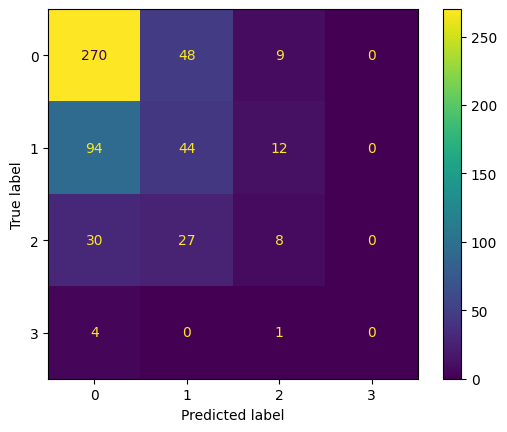

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

m = confusion_matrix(df_test[target_col], predictions)
ConfusionMatrixDisplay(m).plot()


In [68]:
test = pd.read_csv('../data/test.csv')
test[categorical_cols] = test[categorical_cols].astype(str)
test_transformed = pd.DataFrame(
    ohe_pipe.transform(test[categorical_cols]).toarray(),
    columns=ohe_pipe.get_feature_names_out()
)
test_transformed[numerical_columns] = test[numerical_columns]

predictions = rf_model.predict(test_transformed)
